# Generate an execution time prediction for all layers in a model
In this notebook we predict the execution time of one forward/backward pass of the VGG-16 model on a given GPU.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

import mlpredict
import mlpredict.api

### Select the deep neural network and the GPU whose performance should be predicted, select optimizer
The DNN definition has be read from a json file generated from a model class instance. The GPU definition has to be read from a json file stating the parameters "bandwidth", "cores", and "clock"

In [2]:
dnn = 'models/VGG16.json'
gpu = 'V100'
opt = 'SGD'
batchsize = 32

### Import model
mlpredict.api.import_model returns an instance of the dnn class defined in api.py

In [3]:
VGG16 = mlpredict.api.import_dnn('VGG16')

In [4]:
VGG16.describe()

21 layer network

Input size 224x224x3

conv1_1 (Convolution), now 224x224 with 64 channels
conv1_2 (Convolution), now 224x224 with 64 channels
pool1 (Max_pool), now 112x112 with 64 channels
conv2_1 (Convolution), now 112x112 with 128 channels
conv2_2 (Convolution), now 112x112 with 128 channels
pool2 (Max_pool), now 56x56 with 128 channels
conv3_1 (Convolution), now 56x56 with 256 channels
conv3_2 (Convolution), now 56x56 with 256 channels
conv3_3 (Convolution), now 56x56 with 256 channels
pool3 (Max_pool), now 28x28 with 256 channels
conv4_1 (Convolution), now 28x28 with 512 channels
conv4_2 (Convolution), now 28x28 with 512 channels
conv4_3 (Convolution), now 28x28 with 512 channels
pool4 (Max_pool), now 14x14 with 512 channels
conv5_1 (Convolution), now 14x14 with 512 channels
conv5_2 (Convolution), now 14x14 with 512 channels
conv5_3 (Convolution), now 14x14 with 512 channels
pool5 (Max_pool), now 7x7 with 512 channels
FC6 (Convolution), now 1x1 with 4096 channels
FC7 (Convolution

### Predict execution time for a range of batch sizes

In [5]:
batchsize = 2**np.arange(0,6,1)
time_layer = np.zeros([16,6])
time_total = np.zeros(6)

for i in range(len(batchsize)):
    time_total[i], layer, time_layer[:,i] = VGG16.predict(gpu = gpu,
                                                          optimizer = opt,
                                                          batchsize = batchsize[i])

INFO:tensorflow:Restoring parameters from /Users/djustus/Library/Caches/Python-Eggs/mlpredict-0.0.1-py3.6.egg-tmp/mlpredict/model/model_all/variables/variables
INFO:tensorflow:Restoring parameters from /Users/djustus/Library/Caches/Python-Eggs/mlpredict-0.0.1-py3.6.egg-tmp/mlpredict/model/model_all/variables/variables


/Users/djustus/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


INFO:tensorflow:Restoring parameters from /Users/djustus/Library/Caches/Python-Eggs/mlpredict-0.0.1-py3.6.egg-tmp/mlpredict/model/model_all/variables/variables
INFO:tensorflow:Restoring parameters from /Users/djustus/Library/Caches/Python-Eggs/mlpredict-0.0.1-py3.6.egg-tmp/mlpredict/model/model_all/variables/variables
INFO:tensorflow:Restoring parameters from /Users/djustus/Library/Caches/Python-Eggs/mlpredict-0.0.1-py3.6.egg-tmp/mlpredict/model/model_all/variables/variables
INFO:tensorflow:Restoring parameters from /Users/djustus/Library/Caches/Python-Eggs/mlpredict-0.0.1-py3.6.egg-tmp/mlpredict/model/model_all/variables/variables


### Remove duplicate layers and display results

In [6]:
l_unique = layer.copy()
duplicates = [12,11,9,6]
for d in duplicates:
    print(l_unique[d])
    l_unique.pop(d)
    
t_unique = np.delete(time_layer,duplicates,0)

conv5_3
conv5_2
conv4_3
conv3_3


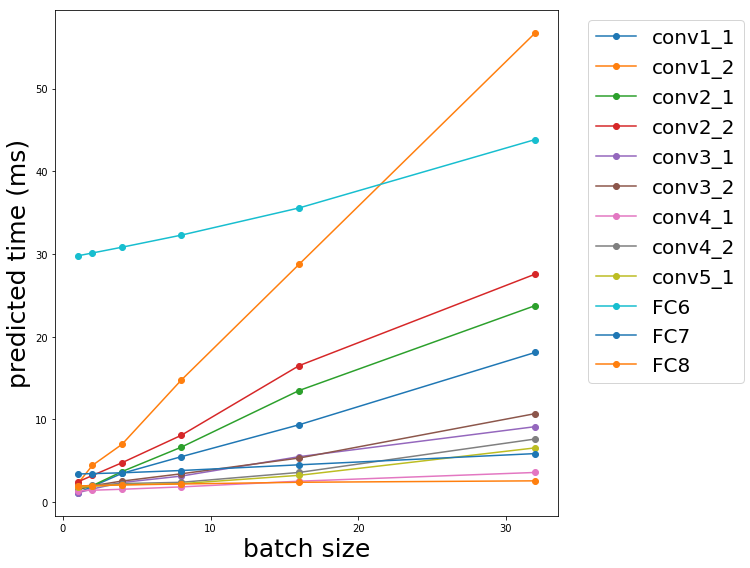

In [7]:
fig,ax = plt.subplots(1,1,figsize=[8,8])
plt.plot(batchsize,t_unique.transpose(),'o-')

ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.xaxis.set_minor_formatter(plt.NullFormatter())
ax.yaxis.set_minor_formatter(plt.NullFormatter())

matplotlib.rc('xtick', labelsize=25) 
matplotlib.rc('ytick', labelsize=25) 

plt.xlabel('batch size',fontsize=25)
plt.ylabel('predicted time (ms)',fontsize=25)

plt.legend(l_unique,bbox_to_anchor=(1.04,1), loc="upper left",fontsize=20)

plt.tight_layout()

plt.show()